In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
import os
sys.path.append('../python/')

#set up matplotlib
os.environ['MPLCONFIGDIR'] = '../mplstyles'
print(os.environ['MPLCONFIGDIR'])
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')
print(mpl.__version__) 
print(mpl.get_configdir())


#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])


#set up numpy
import numpy as np

../mplstyles
3.0.3
/home/phys/villaa/analysis/misc/nrFano_Constraint/mplstyles


# Summary

The purpose of this book is to show how the extracted Fano factor, combined with the expected yield with plus multiple-scatter modification, can predict the trend of the EDELWEISS measured ionization yield width. And, how that final predicted width function can be used to extract the systematic deviation due to the finite binning of the EDELWEISS data. 

In [3]:
import fano_calc as fc
#recall defaults (filename='test.h5', 
#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
E,sig = fc.RWCalc(filename='data/res_calc.h5',band='NR',alpha=(1/18.0),F=999)

GGA3/NR/4.0/5.556E-02/0.0381/999/
True


In [5]:
import h5py
filename = 'data/mcmc_fits.h5'
#remove vars
f = h5py.File(filename,'r')

#save the results for the Edw fit
path='{}/{}/'.format('mcmc','edwdata')

Cms = np.asarray(f[path+'Cms'])
slope = np.asarray(f[path+'m'])
samples = np.asarray(f[path+'samples'])
sampsize = np.asarray(f[path+'sampsize'])
xl = np.asarray(f[path+'Er'])
upvec = np.asarray(f[path+'Csig_u'])
dnvec = np.asarray(f[path+'Csig_l'])
Sigss = np.asarray(f[path+'Sigss'])

print(Cms)
f.close()

0.03132154537261885


In [7]:
# import data from Edelweiss
import pandas as pds
res_data = pds.read_csv("data/edelweiss_NRwidth_GGA3_data.txt", skiprows=1, \
                       names=['E_recoil', 'sig_NR', 'E_recoil_err', 'sig_NR_err'], \
                       delim_whitespace=True)

resER_data = pds.read_csv("data/edelweiss_ERwidth_GGA3_data.txt", skiprows=1, \
                         names=['E_recoil', 'sig_ER', 'sig_ER_err'], \
                         delim_whitespace=True)

resER_data = resER_data.sort_values(by='E_recoil')

print (res_data.head(10))
E_recoil = res_data["E_recoil"]
sig_NR = res_data["sig_NR"]
sig_NR_err = res_data['sig_NR_err']
E_recoil_ER = resER_data["E_recoil"]
sig_ER = resER_data["sig_ER"]
sig_ER_err = resER_data['sig_ER_err']

   E_recoil    sig_NR  E_recoil_err  sig_NR_err
0   16.1946  0.062345      0.946176    0.001157
1   16.4428  0.062345      0.945278    0.001157
2   44.2627  0.046528      0.992477    0.001543
3   24.5012  0.059397      0.992477    0.001185
4   97.7172  0.044847      1.033260    0.002783
5   58.4014  0.050082      0.991830    0.002288
6   34.2156  0.053417      1.033260    0.001102


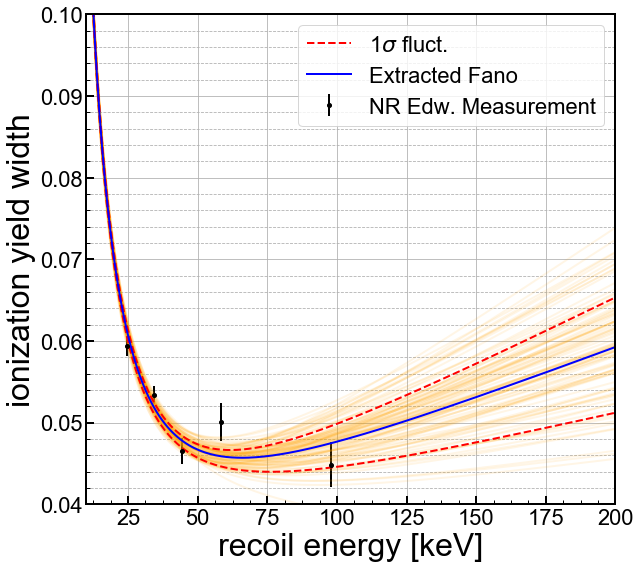

In [9]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

for Cms_em, m_em in samples[np.random.randint(len(samples), size=100)]:
    ax1.plot(xl, np.sqrt(Sigss**2+(Cms_em+m_em*xl)**2), color="orange", alpha=0.1)

ax1.plot(xl,upvec,color='r',linestyle="--",linewidth=2, \
         label='1$\sigma$ fluct.')
ax1.plot(xl,dnvec,color='r',linestyle="--",linewidth=2, \
         label='')

ax1.plot(E,sig,color='b',linestyle="-",linewidth=2, \
        label = 'Extracted Fano')

#ax1.plot(xl,np.sqrt(Sigss**2+(Cms+xl*slope)**2),color='g',linestyle="-",linewidth=3, \
#         label='(C$_0$={:01.3}; m={:01.2E})'.format(Cms,slope))

ax1.errorbar(E_recoil[2::],sig_NR[2::], yerr=sig_NR_err[2::], \
         color='k', marker='o', markersize=4,linestyle='none',label='NR Edw. Measurement', linewidth=2)

ymin = 0.04
ymax = 0.1



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()